In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('data.csv')
data.head()

,Region,Year of Order Date,Quarter of Order Date,Profit
0,East,2012,Q1,-111.80
1,East,2012,Q1,-342.91
2,West,2012,Q1,-193.08
3,West,2012,Q1,247.79
4,West,2012,Q1,-1049.85


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 8399 non-null   object 
 1   Year of Order Date     8399 non-null   int64  
 2   Quarter of Order Date  8385 non-null   object 
 3   Profit                 8392 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 262.6+ KB


In [15]:
data['Region'].unique()

array(['East', 'West', 'Central', 'South'], dtype=object)

In [16]:
reg = 'South'
data[data['Region']==reg]

,Region,Year of Order Date,Quarter of Order Date,Profit
8,South,2012,Q1,-93.1600
10,South,2012,Q1,12.5545
14,South,2012,Q1,-236.4300
16,South,2012,Q1,32.4400
17,South,2012,Q1,14440.3900
...,...,...,...,...
8325,South,2013,Q4,45.3700
8326,South,2013,Q2,788.5080
8327,South,2014,Q2,-64.1100
8328,South,2015,Q1,-158.4200


In [18]:
unique_year = data[data.Profit>0]['Year of Order Date'].unique()
unique_year.sort()
unique_year

array([2012, 2013, 2014, 2015], dtype=int64)

In [19]:
year_profit_case = []
for i in unique_year:
    year_profit_case.append(data[data.Profit>0][data['Year of Order Date'] == i][data['Region'] == reg].Profit.sum())

C:\Users\USER\AppData\Local\Temp\ipykernel_4572\3270333255.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  year_profit_case.append(data[data.Profit>0][data['Year of Order Date'] == i][data['Region'] == reg].Profit.sum())


In [21]:
print(set(zip(unique_year, year_profit_case)))

{(2012, 221722.7315), (2014, 143857.96850000002), (2015, 141425.69749999998), (2013, 111967.246)}


In [25]:
nan_indices = []
for i in range(len(unique_year)):
  if type(unique_year[i])==float:
    nan_indices.append(i)

In [26]:
unique_year = list(unique_year)
year_profit_case = list(year_profit_case)

In [27]:
for i in nan_indices:
  unique_year.pop(i)
  year_profit_case.pop(i)

unique_year

[2012, 2013, 2014, 2015]

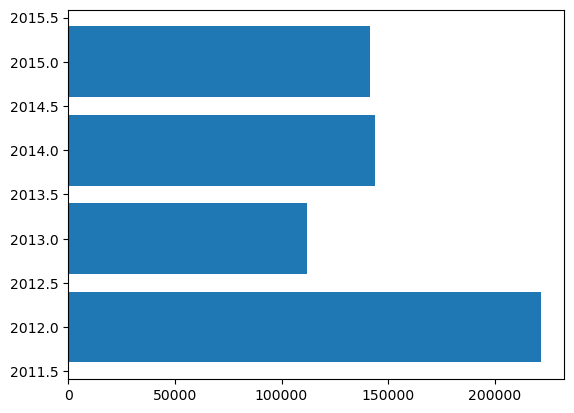

In [28]:
plt.barh(unique_year, year_profit_case)
plt.show()

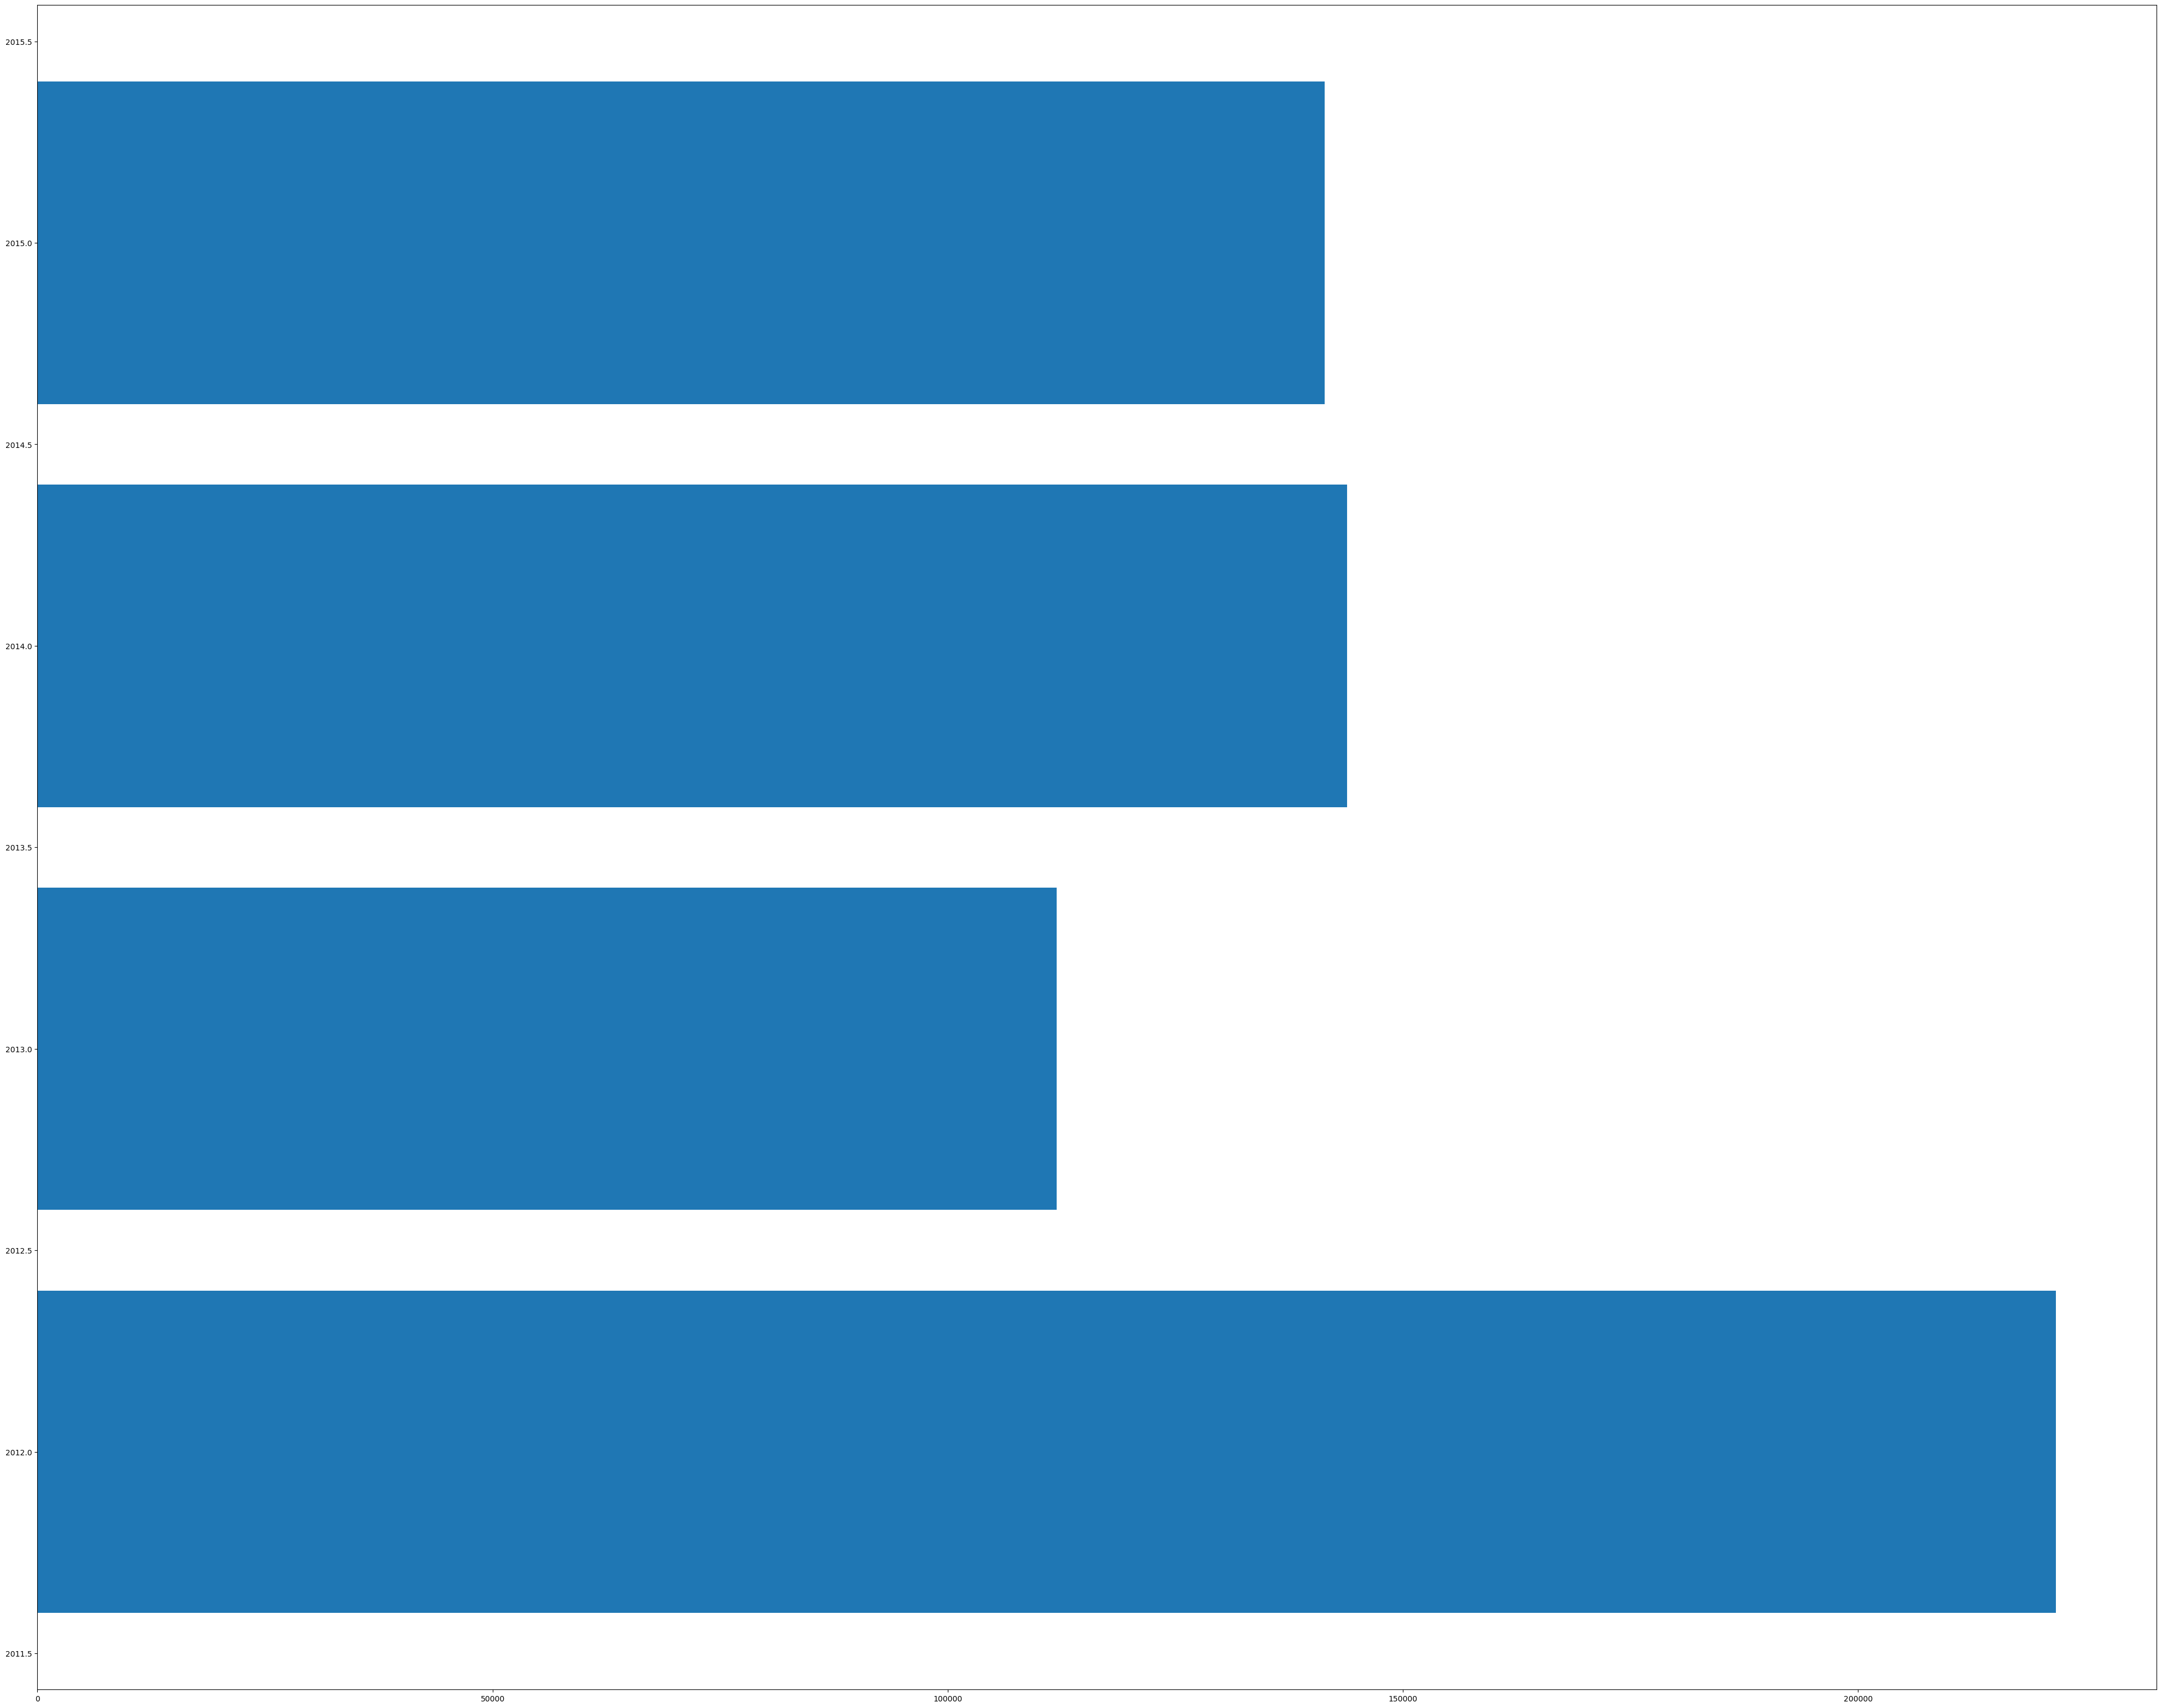

In [29]:
plt.figure(figsize=(50,40))
plt.barh(unique_year, year_profit_case)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(year_profit_case)
plt.legend(unique_countries, loc='best')
plt.show()